# VIDEO GAME SALES - BUSINESS ORIENTED EXPLORATORY ANALYSIS

# Objective

This notebook presents a statistical and strategic study of the video game market using the Video Game Sales dataset. The analysis simulates a Data Analyst's workflow, structured into three main stages:

    Exploration and Data Cleaning: Initial dataset audit to ensure data integrity and perform necessary adjustments for analysis.

    Descriptive Analysis: Application of applied statistics (Frequency Analysis, Measures of Central Tendency, and Dispersion) to outline the industry's historical profile and understand sales behavior.

    Market Intelligence: A deep dive into business-oriented key points, seeking to extract insights on platform efficiency, barriers to entry, and success concentration.

This study does not aim to establish definitive conclusions about the current market, but rather to demonstrate how applying analytical techniques can transform raw data into competitive intelligence and strategic value.

Study Limitations

For an accurate interpretation of the results, it is important to consider the following dataset limitations:

    Timeframe: The data includes releases up to 2016; therefore, it reflects the behavior of past generations (such as PS3, Xbox 360, and Wii) and the beginning of the eighth generation.

    Sales Scope: The focus is on physical sales and major releases, which may not capture the entirety of the digital market and indie games that gained momentum in the final years of the dataset.

    Data Consistency: Any missing or incomplete records for specific years were handled to minimize distortion, but they are inherent to the historical nature of the data source.

# Dataset Description (from Kaggle)

This dataset contains video game sales data across different platforms, genres, and regions, making it valuable for various analytical and business use cases.

Features:

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release ( PC,PS4)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

There are 16,598 records. 2 records were dropped due to incomplete information.
All data was scraped from vgchartz.com website.

# IMPORTING LIBRARIES AND LOADING DATASET

In [1]:
from math import pi
import pandas as pd # Pandas and numpy for Data Manipulation & Analysis
import numpy as np
import matplotlib.pyplot as plt # Matplotlib, Seaborn and Plotly for Data Visualization
from matplotlib.animation import FuncAnimation
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import kagglehub # Kagglehub for data acquisition and retrieval
from kagglehub import KaggleDatasetAdapter
from IPython.display import HTML

file_path = "vgsales.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "anandshaw2001/video-game-sales",
  file_path
)

/home/nicollas/miniconda3/envs/videogame_sales/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATASET OVERVIEW

In [2]:
df.columns = df.columns.str.lower() # Standardizing column names and handling datetime features
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year
df = df[df['year'] <= 2016] # Due to the scarcity of data for 2017 and beyond, the analysis will be limited to records up to 2016

df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,8291.651167,2006.403664,0.265463,0.147591,0.078677,0.048336,0.540343
std,4792.155748,5.826954,0.821684,0.508823,0.311593,0.189907,1.565906
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8294.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
print(df.shape) # Number of lines and columns
print(f"\nData types:\n{df.dtypes}") # Checking data types
print(f"\nDataset goes from {int(df['year'].min())} until {int(df['year'].max())}")



(16323, 11)

Data types:
rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

Dataset goes from 1980 until 2016


In [5]:
df[df.duplicated()] # Checking for duplicated values

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales


In [6]:
print(f"\nQuantifying missing values per column:\n{df.isna().sum()}") # Checking missing values by column
print(f"\nNumber of NA cells: {df.isna().sum().sum()}")
print(f"Missing cells proportion: {round(df.isna().sum().sum() / df.size * 100, 3)}")


Quantifying missing values per column:
rank             0
name             0
platform         0
year             0
genre            0
publisher       36
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

Number of NA cells: 36
Missing cells proportion: 0.02


In [7]:
df.describe(include="all")

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16323.000000,16323,16323,16323.000000,16323,16287,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
unique,NaN,11357,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2132,NaN,3252,1339,NaN,NaN,NaN,NaN,NaN
mean,8291.651167,NaN,NaN,2006.403664,NaN,NaN,0.265463,0.147591,0.078677,0.048336,0.540343
std,4792.155748,NaN,NaN,5.826954,NaN,NaN,0.821684,0.508823,0.311593,0.189907,1.565906
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8294.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


# DESCRIPTIVE ANALYSIS

In this stage, we will apply descriptive statistical techniques to explore and understand the data structure. The objective is to identify patterns, trends, and sales distributions through frequency tables, statistical measures, and graphical visualizations.

Variable Classification and Methodology

For an accurate analysis, data will be handled according to its nature:

    Quantitative Variables (Numerical): These include sales values in millions of units (global_sales, na_sales, etc.) and discrete variables such as rank and year. For these, we will use Histograms to observe distribution skewness and the presence of outliers (extraordinary successes).

    Qualitative Variables (Categorical): These represent attributes such as platform, genre, and publisher. For these, we will use Frequency Tables and Bar Charts to identify market segments with the highest presence.

Below, we will perform an individual exploration of these variables, combining frequency extraction with their respective visual representations. At the end of this section, we will provide a brief interpretation of the observed data, consolidating the key findings of this analysis.

## FREQUENCY

### NUMERICAL VARIABLES

In [63]:
num_cols = df.select_dtypes(include="float64").columns
cat_cols = df.select_dtypes(include="object").columns

df[num_cols].describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,2006.403664,0.265463,0.147591,0.078677,0.048336,0.540343
std,5.826954,0.821684,0.508823,0.311593,0.189907,1.565906
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [64]:

freq_table = pd.DataFrame({
    'freq_abs' : df['year'].value_counts(),
    'freq_rel' : df['year'].value_counts(normalize=True) * 100
}).sort_index(ascending=False).reset_index()

freq_table

,year,freq_abs,freq_rel
0,2016.0,344,2.107456
1,2015.0,614,3.761563
2,2014.0,582,3.565521
3,2013.0,546,3.344973
4,2012.0,657,4.024995
5,2011.0,1139,6.977884
6,2010.0,1259,7.713043
7,2009.0,1431,8.766771
8,2008.0,1428,8.748392
9,2007.0,1202,7.363842


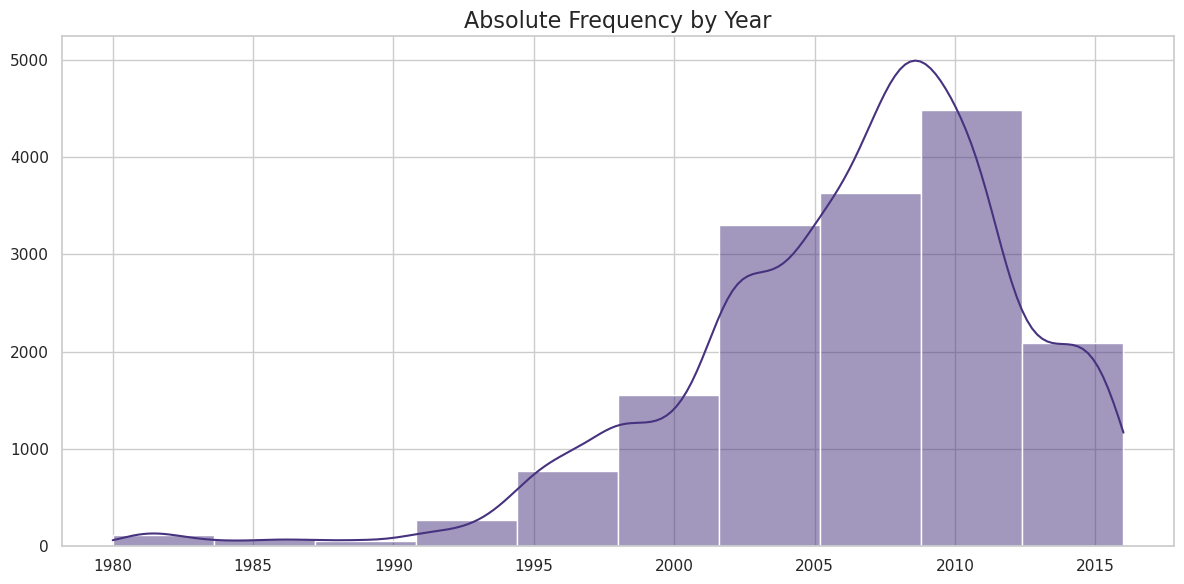

In [65]:
plt.figure(figsize=(12,6), dpi=100)

sns.set_theme(style="whitegrid", palette="viridis")
sns.histplot(df['year'], kde=True, bins=10)

plt.ylabel("")
plt.xlabel("")
plt.title('Absolute Frequency by Year', fontsize=16)


plt.tight_layout()
plt.show()

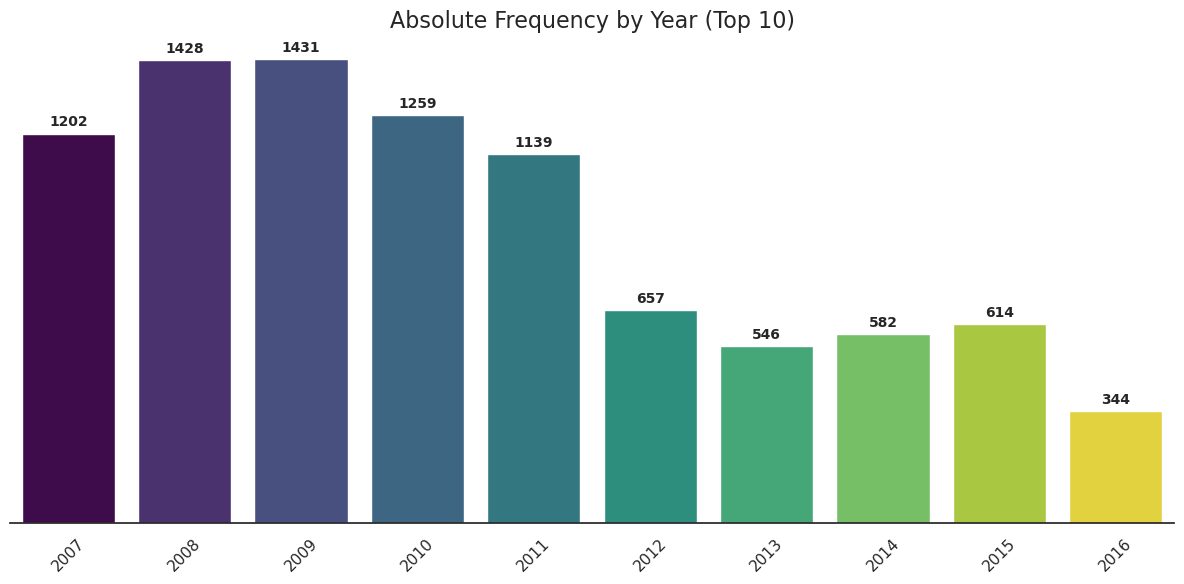

In [66]:
top10 = freq_table['year'].iloc[:10].tolist()

plt.figure(figsize=(12, 6))
freq_table['year'] = freq_table['year'].astype(int)

sns.set_theme(style="white")

ax = sns.barplot(data=freq_table.loc[freq_table.year.isin(top10)],
            x='year',
            y='freq_abs',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Absolute Frequency by Year (Top 10)', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

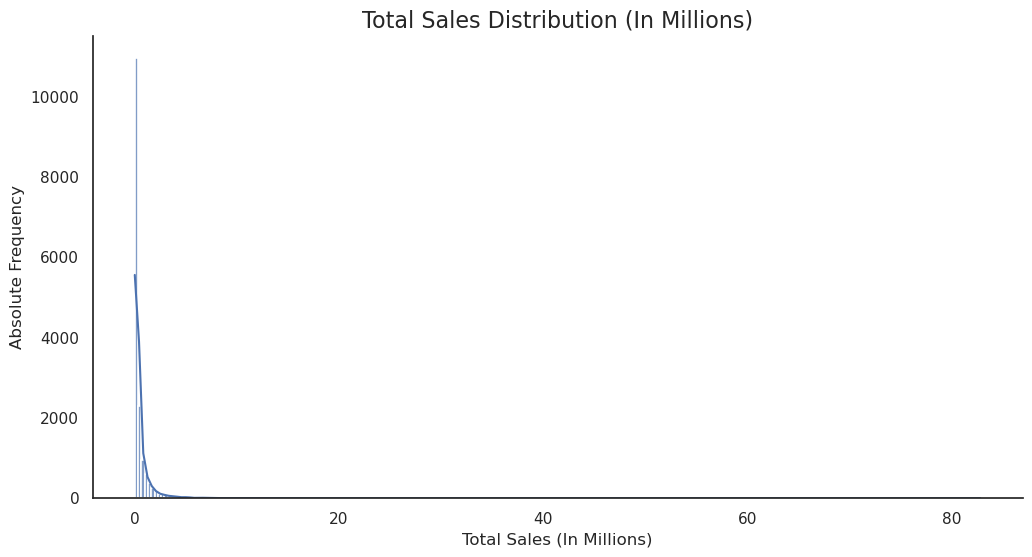

In [67]:
plt.figure(figsize=(12, 6))

sns.set_theme(style='white')

ax = sns.histplot(
    data=df['global_sales'],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Total Sales Distribution (In Millions)', fontsize=16)
plt.xlabel('Total Sales (In Millions)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)

plt.show()

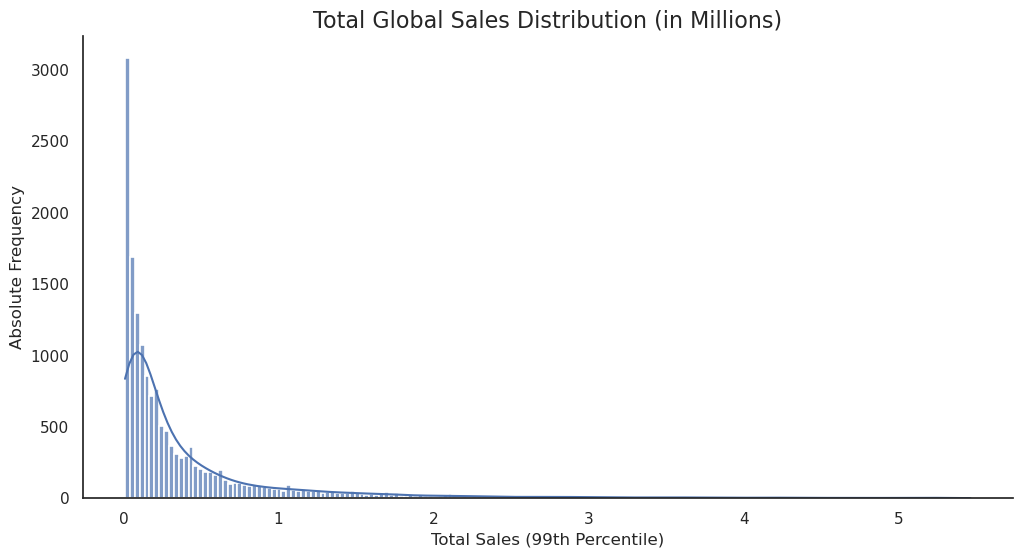

In [68]:
q99_total = df["global_sales"].quantile(0.99) # Analyzing the 99th Percentile


plt.figure(figsize=(12, 6))

sns.set_theme(style='white')

ax = sns.histplot(
    data=df[df["global_sales"] <= q99_total]["global_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Total Global Sales Distribution (in Millions)', fontsize=16)
plt.xlabel('Total Sales (99th Percentile)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)

plt.show()


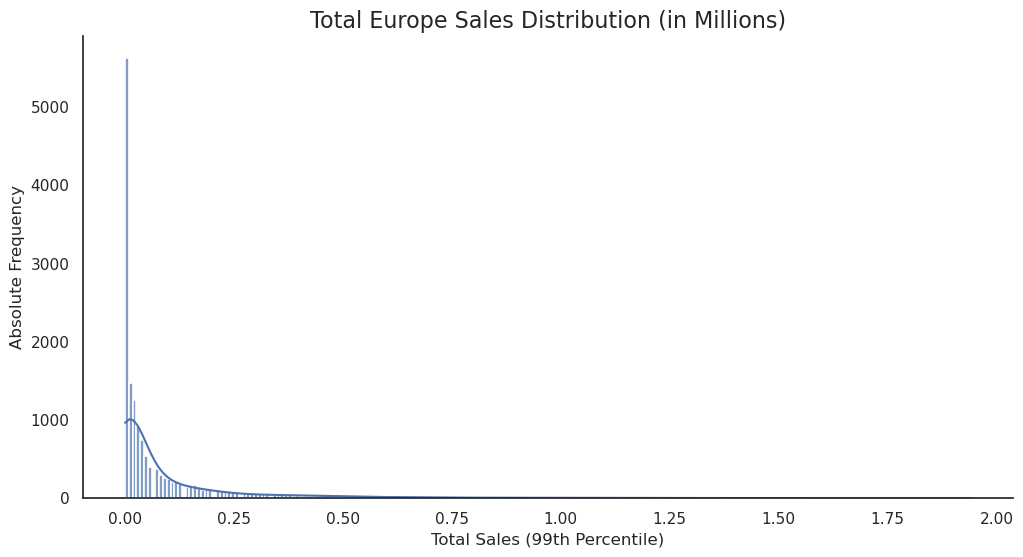

In [69]:
q99_eu = df["eu_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

sns.set_theme(style='white')

ax = sns.histplot(
    data=df[df["eu_sales"] <= q99_eu]["eu_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Total Europe Sales Distribution (in Millions)', fontsize=16)
plt.xlabel('Total Sales (99th Percentile)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)

plt.show()

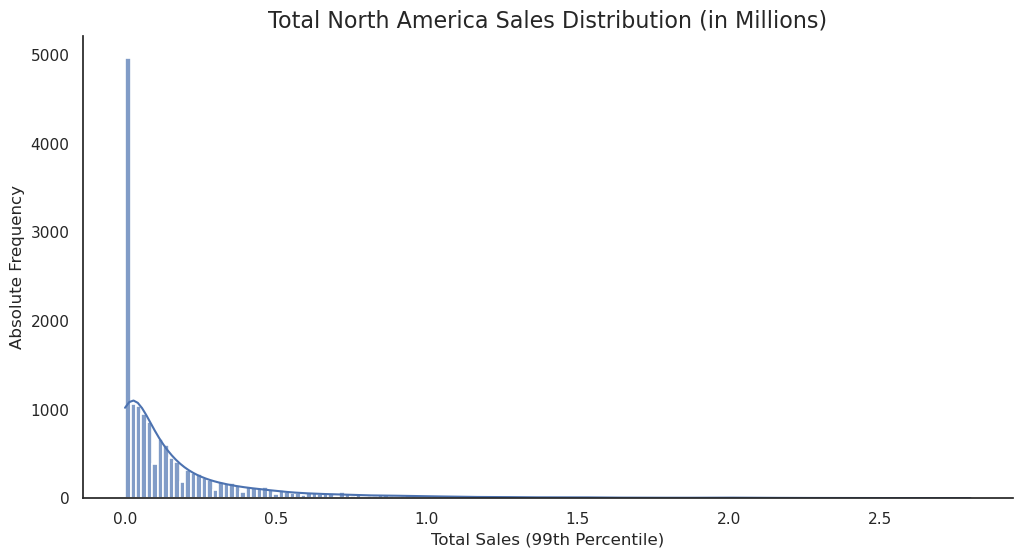

In [70]:
q99_na = df["na_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["na_sales"] <= q99_na]["na_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Total North America Sales Distribution (in Millions)', fontsize=16)
plt.xlabel('Total Sales (99th Percentile)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)

plt.show()

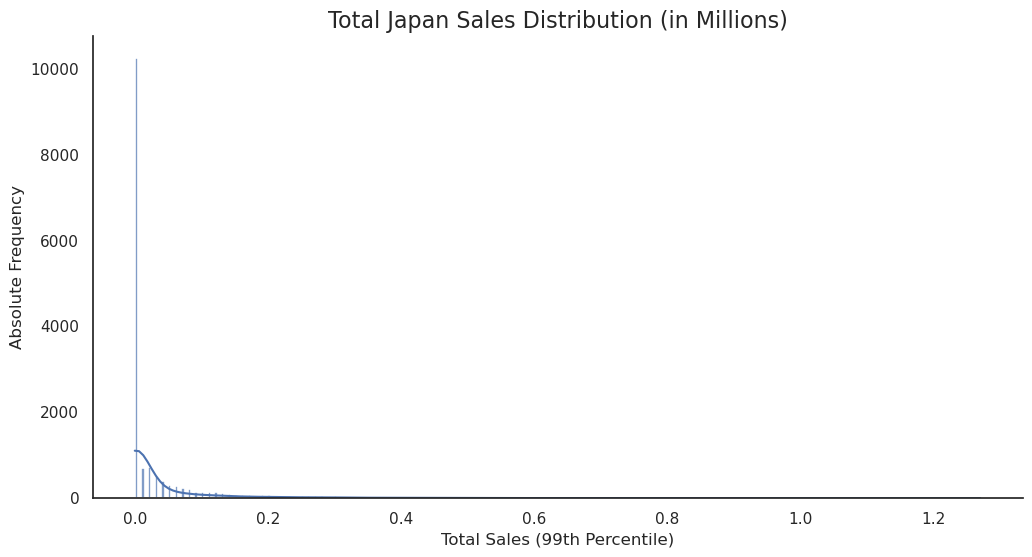

In [71]:
q99_jp = df["jp_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["jp_sales"] <= q99_jp]["jp_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Total Japan Sales Distribution (in Millions)', fontsize=16)
plt.xlabel('Total Sales (99th Percentile)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)

plt.show()

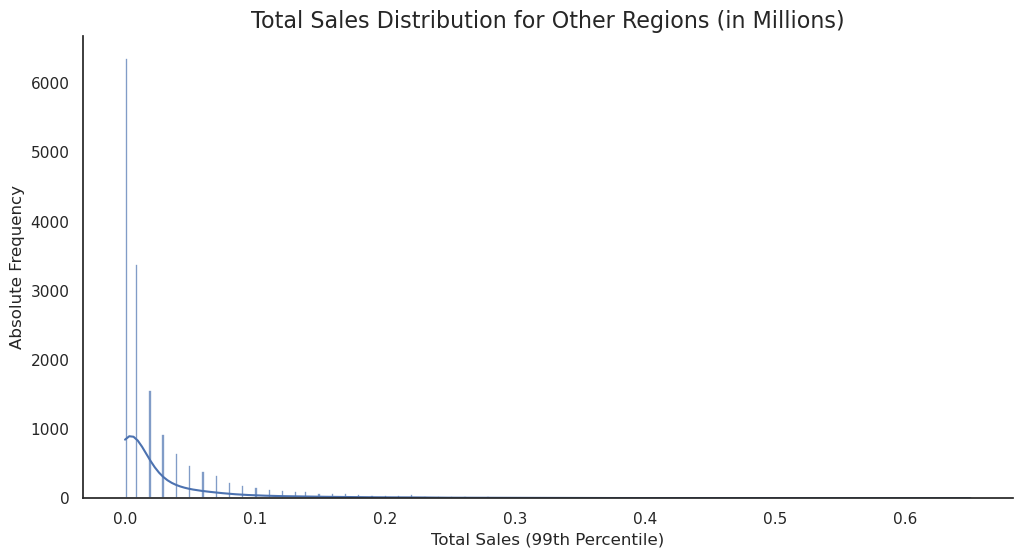

In [72]:
q99_other = df["other_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["other_sales"] <= q99_other]["other_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Total Sales Distribution for Other Regions (in Millions)', fontsize=16)
plt.xlabel('Total Sales (99th Percentile)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)

plt.show()

The analysis of regional sales distributions reveals a consistently skewed pattern, characterized by **heavy tails** and a strong presence of **outliers** across all analyzed regions. This result indicates that the majority of titles achieve relatively modest sales, while a few games concentrate significant volumes. Additionally, the release timeline shows a pronounced **spike** between 2008 and 2010.

### Categorical Variables

In [18]:
freq_names = pd.DataFrame({
    "freq_abs":df['name'].value_counts()
}).reset_index().sort_values(by=['freq_abs'], ascending=False)

freq_names

,name,freq_abs
0,Need for Speed: Most Wanted,12
1,FIFA 14,9
2,LEGO Marvel Super Heroes,9
3,Ratatouille,9
4,FIFA Soccer 13,8
...,...,...
11352,Wii Play,1
11353,New Super Mario Bros.,1
11354,Pokemon Red/Pokemon Blue,1
11355,Wii Sports Resort,1


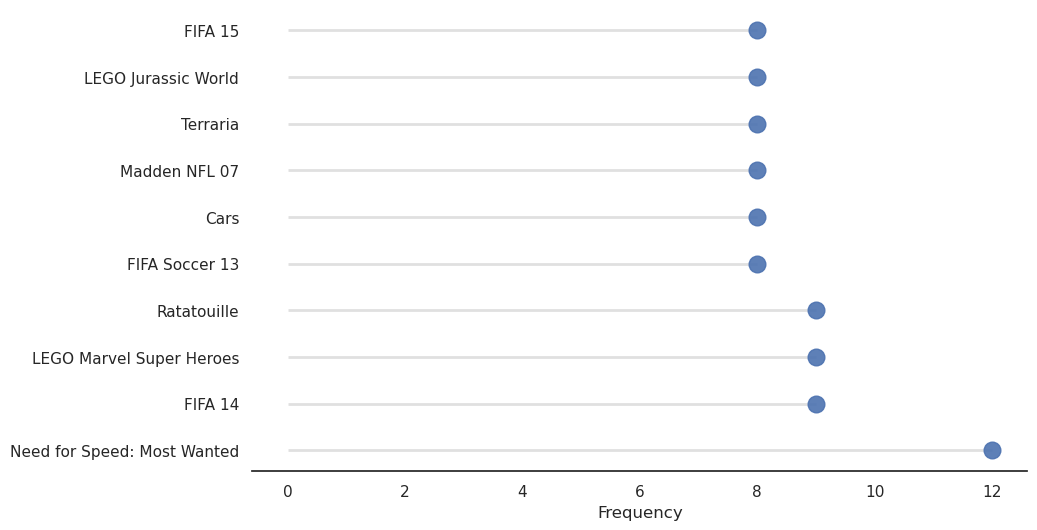

In [19]:
top10_names = freq_names[:10]
my_range=range(len(top10_names.index))

plt.figure(figsize=(10, 6))
ax = plt.gca()

plt.hlines(y=top10_names["name"], xmin=0, xmax=top10_names['freq_abs'], color='lightgray', linewidth=2, alpha=0.7)

plt.plot(top10_names['freq_abs'], my_range, "o", markersize=12, alpha=0.9)

sns.despine(left=True, bottom=False)

plt.yticks(my_range, top10_names['name'])
plt.xlabel('Frequency')
plt.ylabel('')

plt.show()

In [20]:
print(df['platform'].unique()) # Available Platforms

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


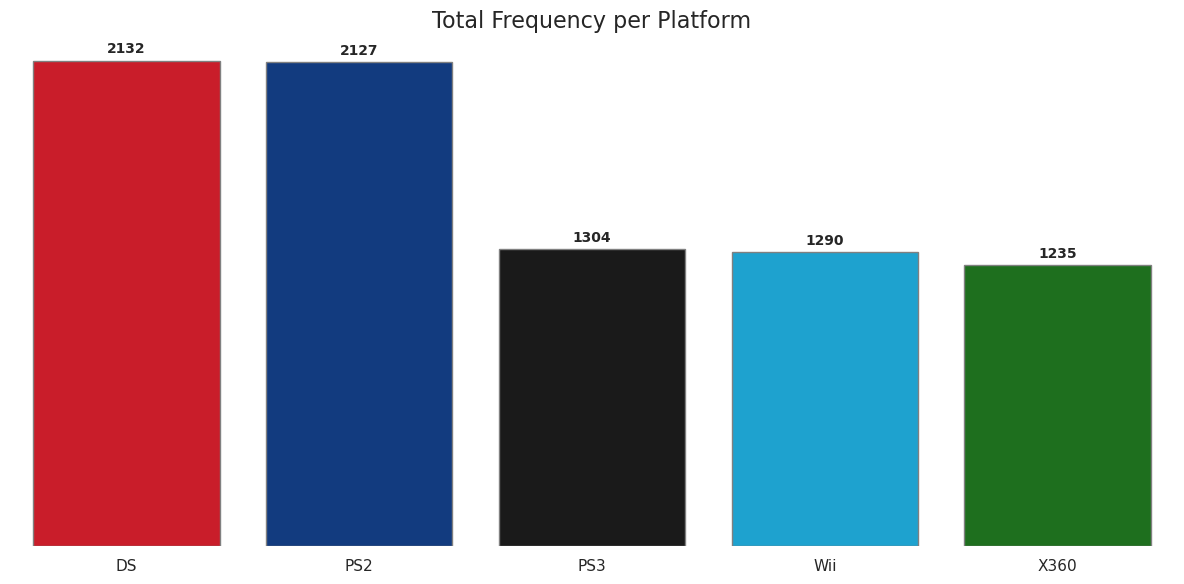

In [21]:
console_freq = pd.DataFrame({
    "frequency": df['platform'].value_counts(),
    "relative_frequency": df['platform'].value_counts(normalize=True) * 100
}
).sort_values(by=['frequency'], ascending=False).reset_index()

console_5 = console_freq[:5]

plt.figure(figsize=(12, 6))

color = ['#E60012', "#003791", '#1A1A1A', '#00B0ED', '#107C10']

ax = sns.barplot(data=console_5,
            x='platform',
            y='frequency',
            palette=color,
            hue='platform',
            edgecolor='gray',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Total Frequency per Platform', fontsize=16)

plt.yticks([])

plt.tight_layout()
plt.show()

In [22]:
console_5 = console_freq[:5]
console_5.head()

,platform,frequency,relative_frequency
0,DS,2132,13.061325
1,PS2,2127,13.030693
2,PS3,1304,7.988728
3,Wii,1290,7.902959
4,X360,1235,7.566011


In [23]:
fig = go.Figure(go.Barpolar(
    r=console_5['frequency'],
    theta=console_5['platform'],
    marker_color=console_5['frequency'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.85
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, console_5['frequency'].max() * 1.1]
        )
    ),
    width=500,
    height=500
)

fig.show()


In [24]:
freq_genres = pd.DataFrame({
    "frequency": df['genre'].value_counts(),
    "rel_frequency" : df['genre'].value_counts(normalize=True) * 100
}).sort_values(by='frequency', ascending=False).reset_index()

freq_genres.head(10)

,genre,frequency,rel_frequency
0,Action,3252,19.922808
1,Sports,2304,14.115052
2,Misc,1710,10.476015
3,Role-Playing,1469,8.999571
4,Shooter,1282,7.853948
5,Adventure,1276,7.817190
6,Racing,1226,7.510874
7,Platform,876,5.366661
8,Simulation,850,5.207376
9,Fighting,836,5.121608


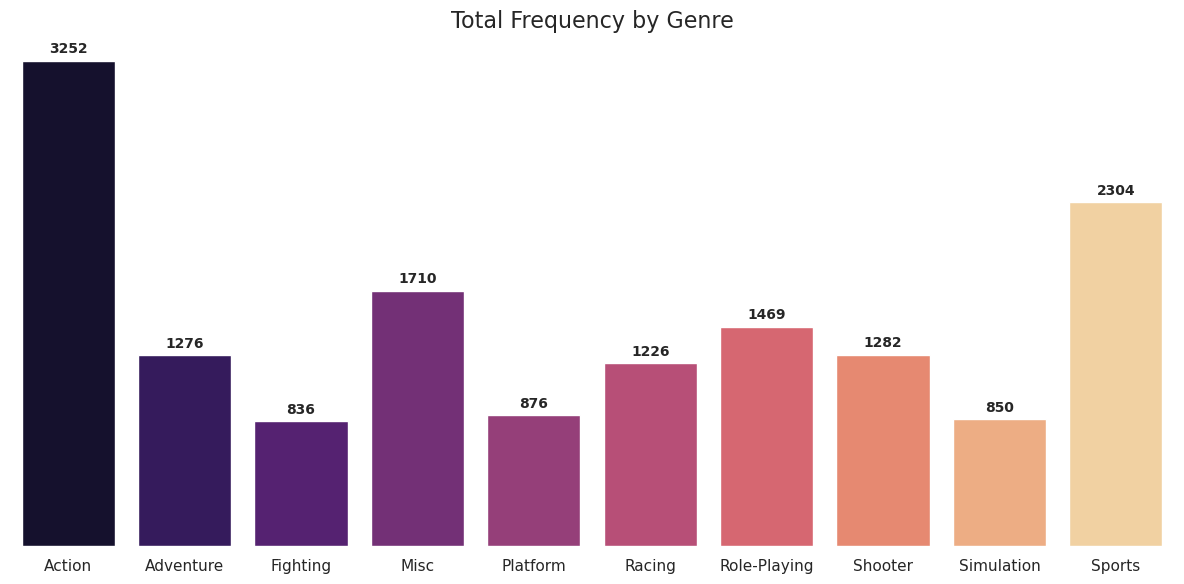

In [25]:
genres_top10 = freq_genres[:10].sort_values(by='genre')

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=genres_top10,
            x='genre',
            y='frequency',
            palette='magma',
            hue='genre',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Total Frequency by Genre', fontsize=16)

plt.yticks([])

plt.tight_layout()
plt.show()

In [26]:
publisher_freq = pd.DataFrame({
    "frequency": df['publisher'].value_counts(),
    "rel_frequency": df['publisher'].value_counts(normalize=True) * 100
}).sort_values(by='frequency', ascending=False).reset_index()
publisher_freq.head()

,publisher,frequency,rel_frequency
0,Electronic Arts,1339,8.221281
1,Activision,966,5.931111
2,Namco Bandai Games,928,5.697796
3,Ubisoft,917,5.630257
4,Konami Digital Entertainment,823,5.053110


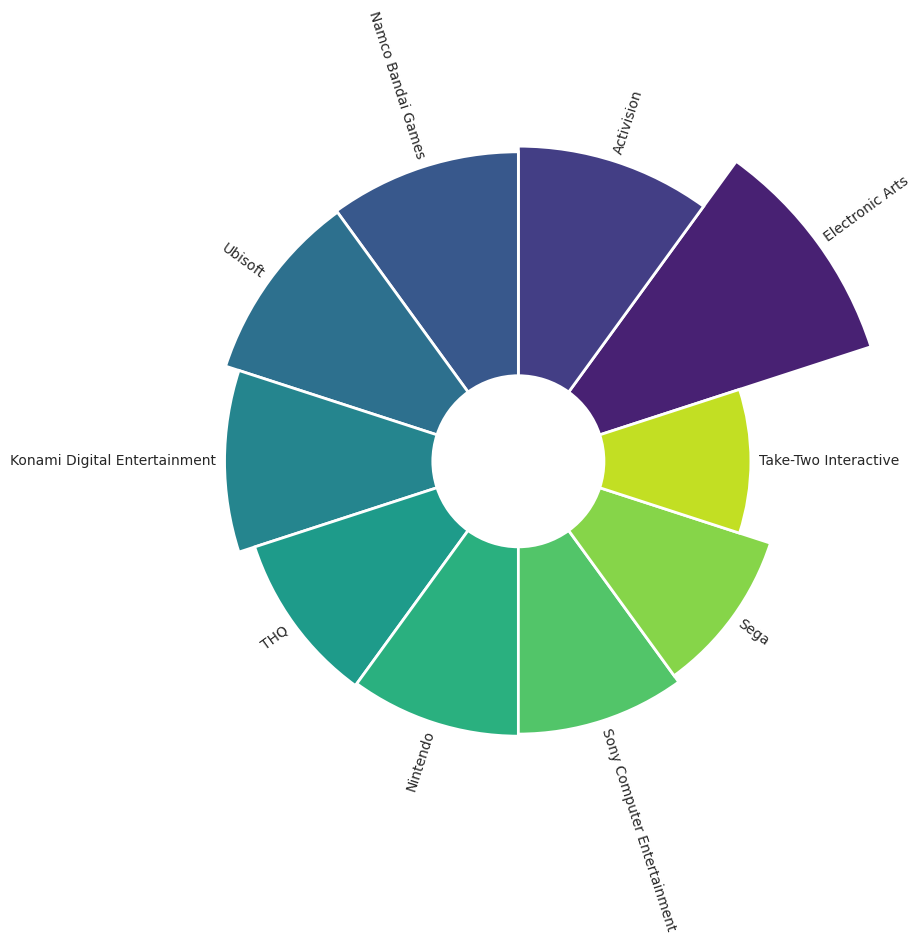

In [27]:

publisher_top10 = publisher_freq[:10]

max_val = publisher_top10['frequency'].max()

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 30

# Adjusting the heights calculation using the lower and upper limit
slope = (upperLimit - lowerLimit) / max_val
heights = slope * publisher_top10.frequency + lowerLimit

# width -> complete circle / number of publishers
width = 2*np.pi / len(publisher_top10.index)
indexes = list(range(1, len(publisher_top10.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color=sns.color_palette("viridis", len(publisher_top10))
)

# Adding publisher names
for i, bar in enumerate(bars):
    angle_rad = angles[i]
    angle_deg = np.rad2deg(angle_rad)
    
    # If the text is in the bottom part (90-270 degrees), we spin 180° so the text doesn't get upside down
    if 90 < angle_deg < 270:
        rotation = angle_deg + 180
        alignment = "right"
    else:
        rotation = angle_deg
        alignment = "left"

    ax.text(
        x=angle_rad, 
        y=lowerLimit + heights[i] + 3,
        s=publisher_top10['publisher'].iloc[i], 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize=10
    )

plt.show()

The frequency analysis of categorical variables indicates a higher concentration of titles on the DS and PS2 platforms, a pattern consistent with the peak in releases observed between 2008 and 2010. Regarding genres, there is a predominance of **Action** titles, followed by Sports, both showing significantly higher frequencies compared to other genres. This suggests a stronger industry focus on categories with broader appeal. As for publishers, EA, Activision, and Bandai Namco hold the highest number of released titles, indicating a larger scale of production.

## CENTRAL TENDENCY MEASURES

### MEAN

In [28]:
sales_mean = pd.DataFrame({
    'region': ['global_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales'],
    'mean': [
        df['global_sales'].mean(),
        df['jp_sales'].mean(),
        df['eu_sales'].mean(),
        df['na_sales'].mean(),
        df['other_sales'].mean()
    ]
})

sales_mean

,region,mean
0,global_sales,0.540343
1,jp_sales,0.078677
2,eu_sales,0.147591
3,na_sales,0.265463
4,other_sales,0.048336


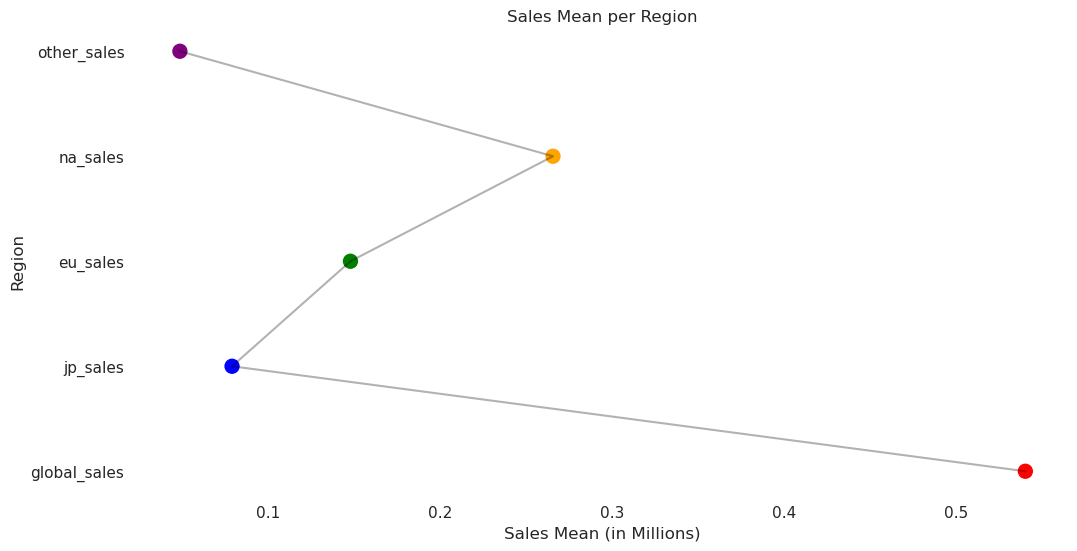

In [29]:
plt.figure(figsize=(12, 6))

sns.set_style('white')

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.scatter(sales_mean['mean'], sales_mean['region'], c=colors, s=100)
plt.plot(sales_mean['mean'], sales_mean['region'], color='black', alpha=0.3)

sns.despine(left=True, bottom=True)

plt.xlabel('Sales Mean (in Millions)')
plt.ylabel('Region')
plt.title('Sales Mean per Region')

plt.show()

### MEDIAN

In [30]:
sales_median = pd.DataFrame({
    'region': ['global_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales'],
  'median': [    
    df['global_sales'].median(),
    df['jp_sales'].median(),
    df['eu_sales'].median(),
    df['na_sales'].median(),
    df['other_sales'].median()]
}
)

sales_median

,region,median
0,global_sales,0.17
1,jp_sales,0.00
2,eu_sales,0.02
3,na_sales,0.08
4,other_sales,0.01


### MODE

In [31]:
sales_mode = pd.DataFrame({
  'mode': [    df['name'].mode(),
    df['platform'].mode(),
    df['genre'].mode(),
    df['publisher'].mode(),
    ]
}, index=['name', 'platform', 'genre', 'publisher'])

sales_mode

,mode
name,"0 Need for Speed: Most Wanted Name: name, d..."
platform,"0 DS Name: platform, dtype: object"
genre,"0 Action Name: genre, dtype: object"
publisher,"0 Electronic Arts Name: publisher, dtype: o..."


Across all analyzed regions, the mean is substantially higher than the median, indicating strongly *right-skewed* distributions. It is observed that in certain regions, such as Japan, the median sales value is zero, which reinforces the high concentration of sales within a small number of titles. This pattern suggests that most games have limited regional performance, while a few titles account for significant volumes, a behavior consistent with the previously shown histograms. It is important to note that sales are measured in **millions** of units, which can result in zero medians in regions where the majority of titles have sales figures below this threshold.

## DISPERSION MEASURES

### STANDARD DEVIATION AND VARIANCE

In [32]:

sales = ['global_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales']
std = df[sales].std()

variance = df[sales].var()

print("Standard Deviation:\n", std)

print("\nVariance:\n", variance)

Standard Deviation:
 global_sales    1.565906
jp_sales        0.311593
eu_sales        0.508823
na_sales        0.821684
other_sales     0.189907
dtype: float64

Variance:
 global_sales    2.452063
jp_sales        0.097090
eu_sales        0.258901
na_sales        0.675164
other_sales     0.036065
dtype: float64


### Interquartile Range

In [33]:

q3 = df[sales].quantile(0.75)
q1 = df[sales].quantile(0.25)
iqr = q3 - q1

print("Quartiles:\n", df[sales].quantile([0.25, 0.5, 0.75]))
print(f'\nIQR:\n{iqr}')

# Verifying data that is below Q1 - 1.5 * IQR or above Q3 + 1.5*IQR (outliers)

bottom_limit = q1 - (1.5 * iqr)
top_limit = q3 + (1.5 * iqr)

outliers = ((df[sales] < bottom_limit) | (df[sales] > top_limit))
df_outliers = df[outliers.any(axis=1)]
outlier_count = outliers.sum()

print(f"\nNumber of records with at least one outlier: {len(df_outliers)}\n")
print(f"Amount of outliers per column:\n{outlier_count}")

df_outliers.head()

Quartiles:
       global_sales  jp_sales  eu_sales  na_sales  other_sales
0.25          0.06      0.00      0.00      0.00         0.00
0.50          0.17      0.00      0.02      0.08         0.01
0.75          0.48      0.04      0.11      0.24         0.04

IQR:
global_sales    0.42
jp_sales        0.04
eu_sales        0.11
na_sales        0.24
other_sales     0.04
dtype: float64

Number of records with at least one outlier: 4526

Amount of outliers per column:
global_sales    1827
jp_sales        2407
eu_sales        2054
na_sales        1660
other_sales     1645
dtype: int64


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


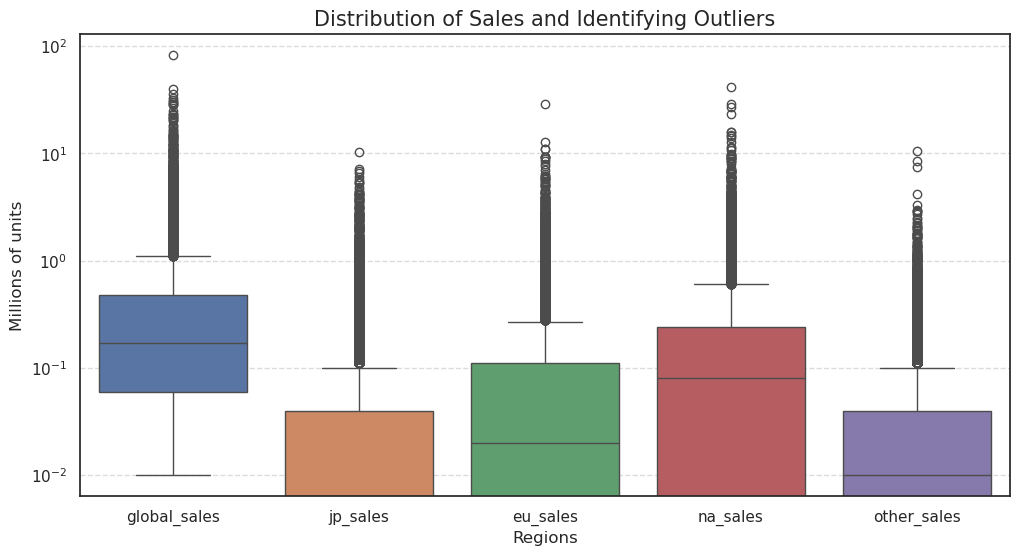

In [34]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df[sales])

plt.title('Distribution of Sales and Identifying Outliers', fontsize=15)
plt.ylabel('Millions of units')
plt.xlabel('Regions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')


plt.show()

Across all analyzed regions, **variance**, **standard deviation**, and **boxplots** indicate strongly **right-skewed** distributions. The high values for **standard deviation** and **variance**, particularly in Global and North American sales, reveal high dispersion, with a small number of titles accounting for significant sales volumes.

The **boxplot** reinforces this pattern by showing medians close to the minimum values and a large number of upper **outliers**, evidencing that the majority of games have low sales. In regions such as Japan and Other Regions, lower variance and standard deviation values are associated with smaller boxes and greater homogeneity, albeit at lower overall sales levels.

Overall, the results confirm a highly concentrated market, where a few 'hits' dominate sales, while the vast majority of titles exhibit limited performance.

# EXPLORATORY ANALYSIS
In this stage, we will explore the data from a **global perspective** to understand the evolution of the gaming industry over the decades and identify the key characteristics that dominate the market, both globally and regionally.

We will begin with a **visual analysis of the industry's trajectory** from 1980 to 2016, observing how the volume of releases and sales behaved in response to shifts in technology and consumer behavior.

## SALES OVER THE YEARS

In [58]:

df_anim = df.groupby('year')['global_sales'].sum().reset_index()
df_anim = df_anim.sort_values('year')

fig, ax = plt.subplots(figsize=(12, 6))

def update(i):
    ax.clear() 
    
    data = df_anim.iloc[:i+1]

    current_year = int(data['year'].iloc[-1])
    current_sales = data['global_sales'].iloc[-1]
    

    # Main lineplot
    ax.plot(data['year'], data['global_sales'], color='#007acc', linewidth=3, alpha=0.8)

    # Filling the area below the lineplot
    ax.fill_between(data['year'], data['global_sales'], color='#007acc', alpha=0.2)
    
    # Scatter plot that follows the line
    ax.scatter(current_year, current_sales, color='#007acc', s=100, edgecolors='white', zorder=5)
    
    ax.set_title(f'Global Sales Year: {int(df_anim.iloc[i]["year"])}', fontsize=16)
    ax.set_ylabel('Sales (in Millions)')
    ax.set_ylim(0, df_anim['global_sales'].max() * 1.1)
    ax.set_xlim(df_anim['year'].min() - 1, df_anim['year'].max() + 1)


ani = FuncAnimation(fig, update, frames=len(df_anim), interval=200, repeat=False)

plt.close()

HTML(ani.to_jshtml())

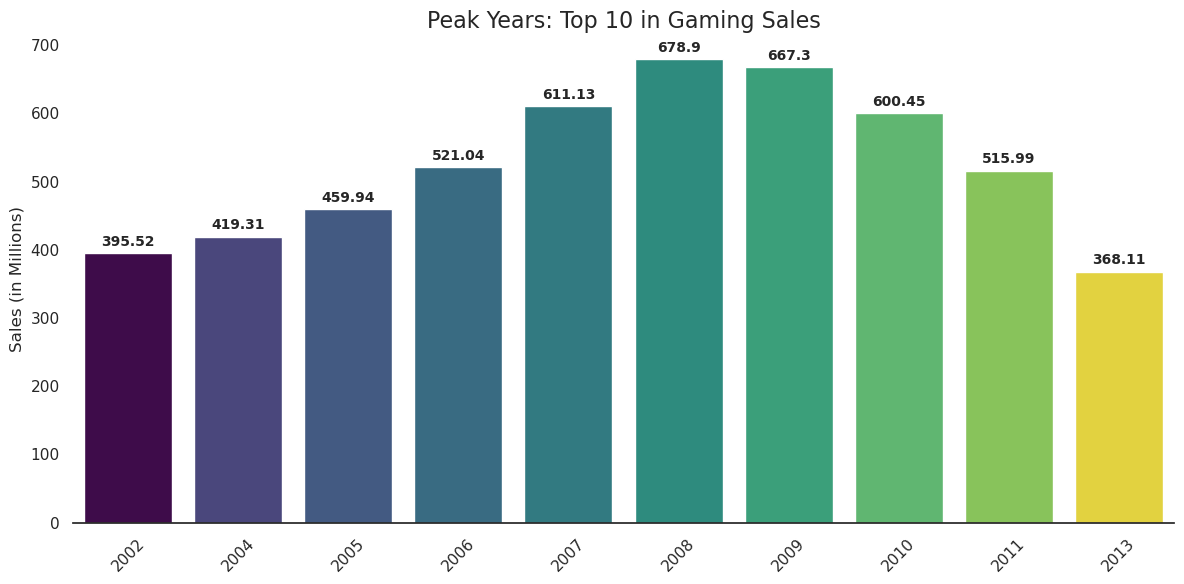

In [36]:
sales_10 = df_anim.nlargest(10, 'global_sales')
sales_10['year'] = sales_10['year'].astype(int)

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=sales_10,
            x='year',
            y='global_sales',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Sales (in Millions)')
ax.set_xlabel('')

plt.title('Peak Years: Top 10 in Gaming Sales', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Best-selling Games

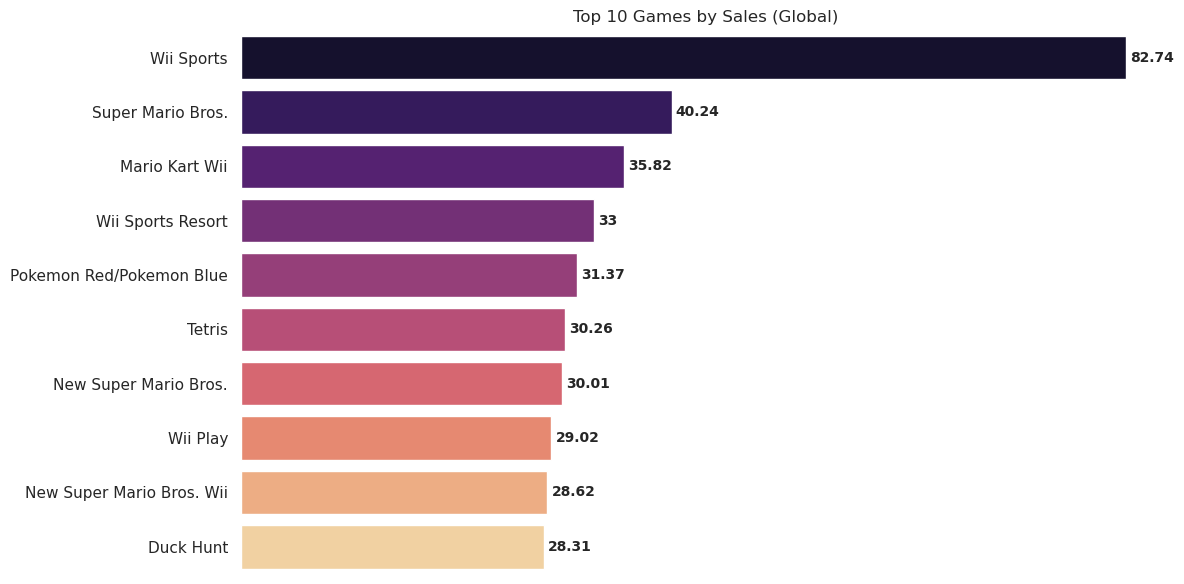

In [37]:

plt.figure(figsize=(12, 6))

top10_global = df.nlargest(10, 'global_sales')
sns.set_style(style="white")

ax = sns.barplot(data=top10_global, 
                 x='global_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Top 10 Games by Sales (Global)")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


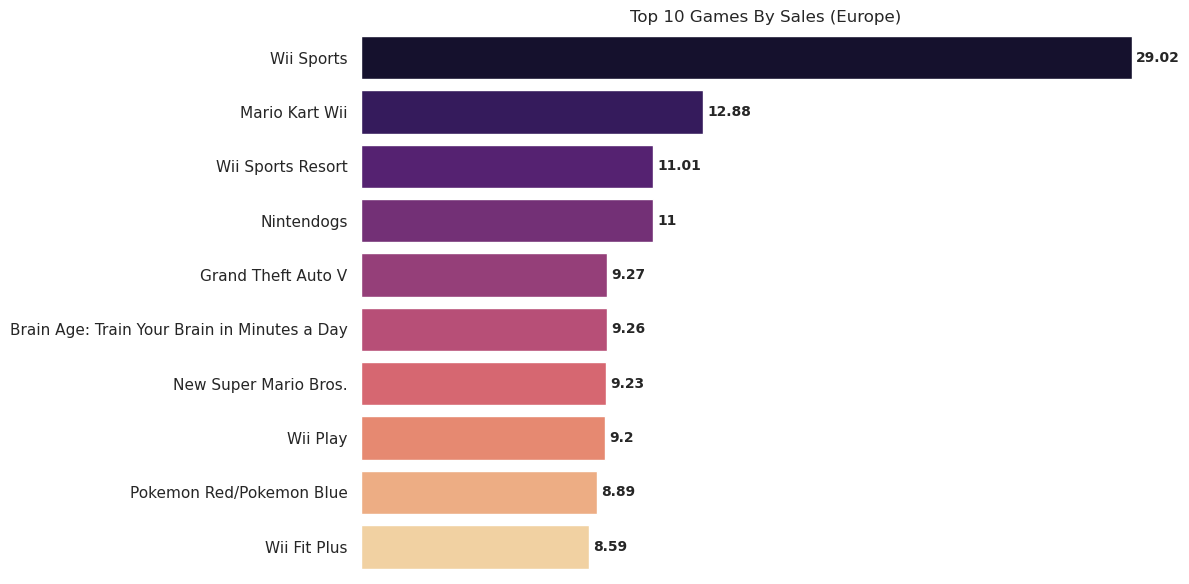

In [38]:
plt.figure(figsize=(12, 6))

top10_eu = df.nlargest(10, 'eu_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_eu, 
                 x='eu_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Top 10 Games By Sales (Europe)")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


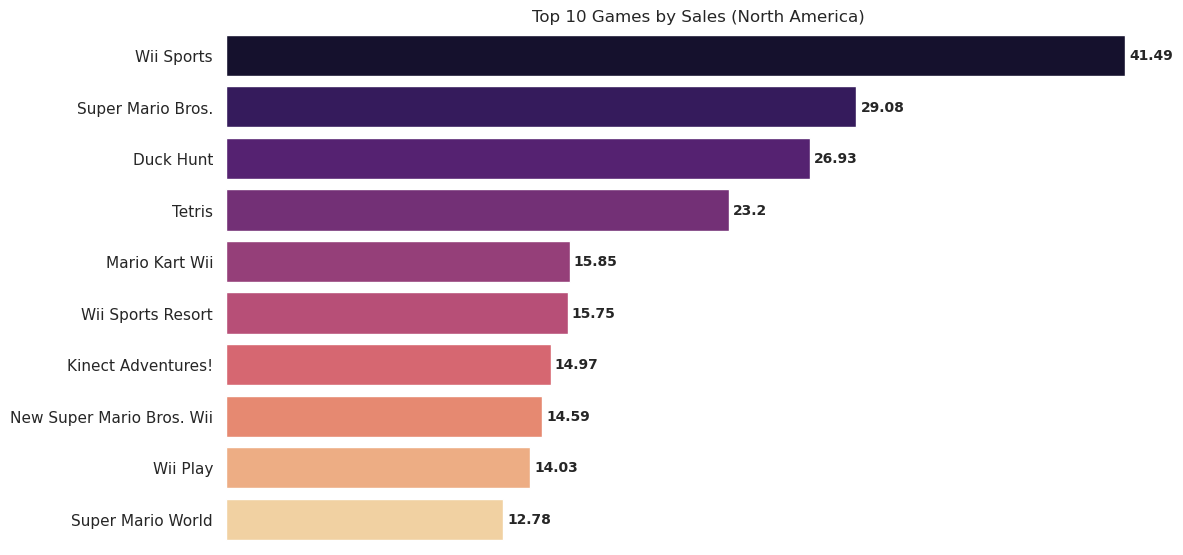

In [39]:
plt.figure(figsize=(12, 6))

top10_na = df.nlargest(10, 'na_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_na, 
                 x='na_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Top 10 Games by Sales (North America)")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()
plt.xticks([])

plt.show()


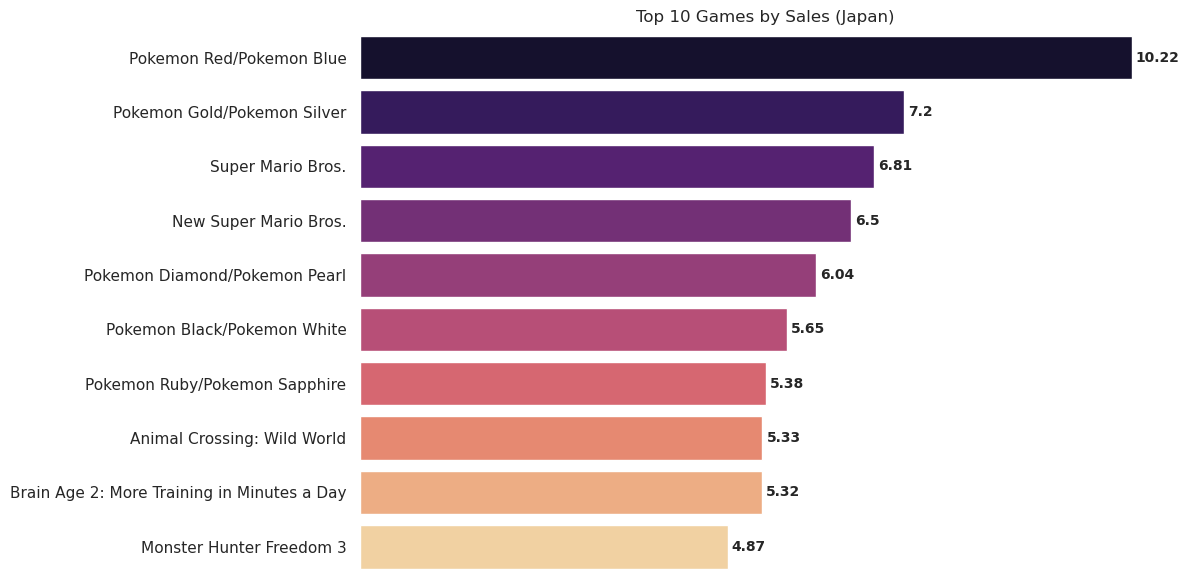

In [40]:
plt.figure(figsize=(12, 6))

top10_jp = df.nlargest(10, 'jp_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_jp, 
                 x='jp_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Top 10 Games by Sales (Japan)")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


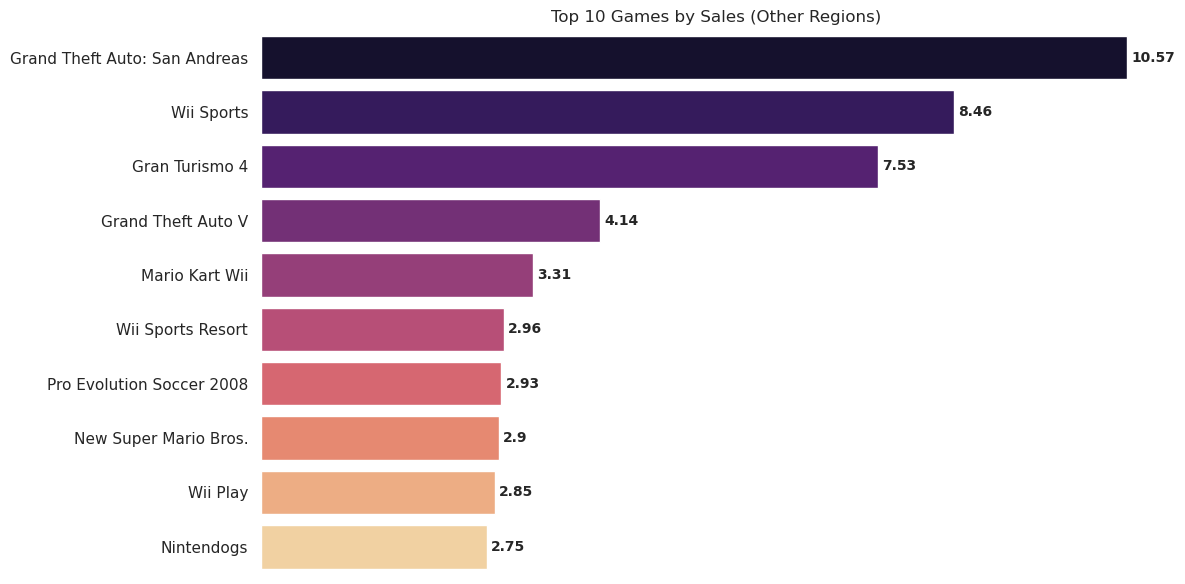

In [41]:
plt.figure(figsize=(12, 6))

top10_other = df.nlargest(10, 'other_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_other, 
                 x='other_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Top 10 Games by Sales (Other Regions)")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()


plt.show()


## Platforms with Highest Sales

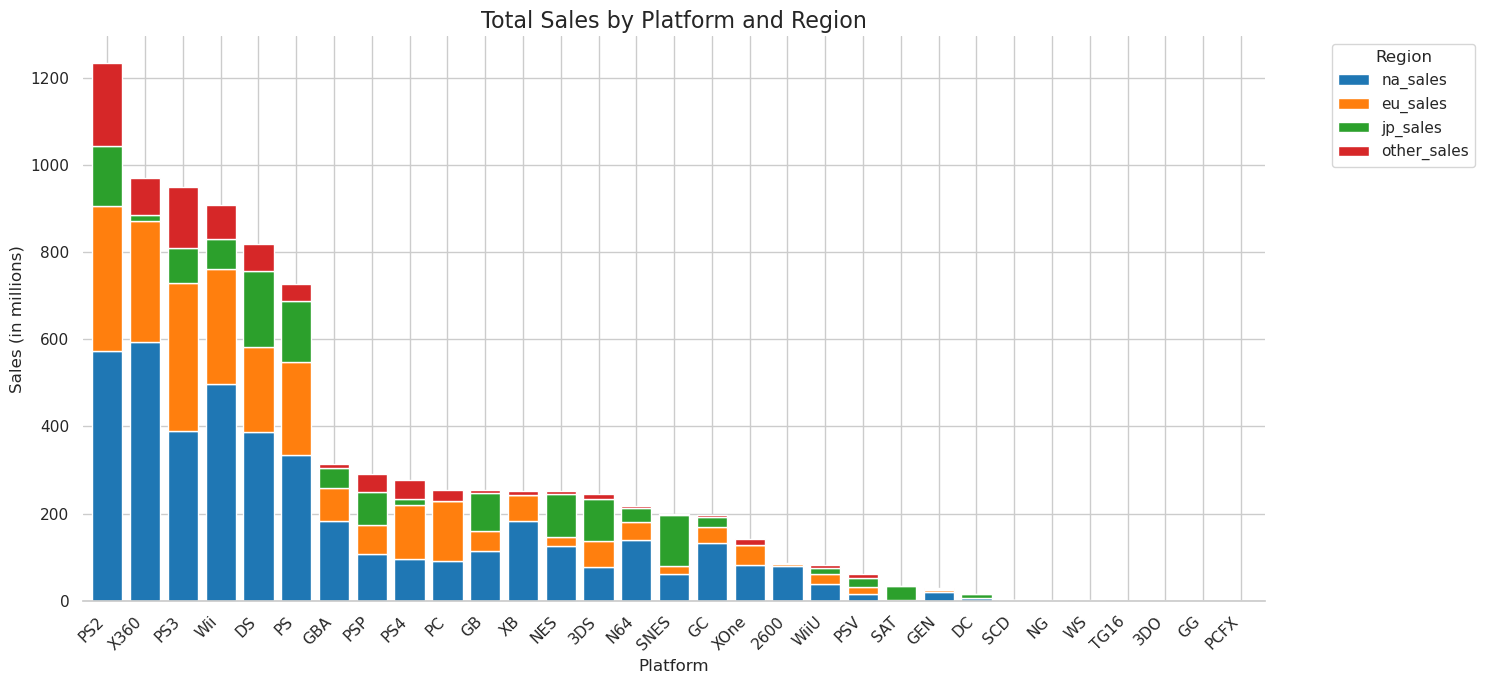

In [42]:
grouped_sales = df.groupby('platform')[['na_sales', 'global_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
grouped_sales = grouped_sales.sort_values('global_sales', ascending=False)
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

sns.set_theme(style='whitegrid')
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

ax = grouped_sales[regions].plot(kind='bar', 
                                 stacked=True, 
                                 figsize=(15, 7), 
                                 width=0.8,
                                 color=custom_colors,
                                 edgecolor='white')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.title('Total Sales by Platform and Region', fontsize=16)
plt.ylabel('Sales (in millions)')
plt.xlabel('Platform', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine(left=True)

plt.tight_layout()
plt.show()



## Sales by Genre

In [43]:

genre_na = df.groupby('genre')['na_sales'].sum().reset_index()

fig = px.treemap(
    genre_na,
    path=['genre'],
    values='na_sales',
    color='na_sales',
    color_continuous_scale='viridis',
    title='Sales by Genre in North America'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [44]:

genre_eu = df.groupby('genre')['eu_sales'].sum().reset_index()

fig = px.treemap(
    genre_eu,
    path=['genre'],
    values='eu_sales',
    color='eu_sales',
    color_continuous_scale='viridis',
    title='Sales by Genre in Europe'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [45]:
genre_jp = df.groupby('genre')['jp_sales'].sum().reset_index()

fig = px.treemap(
    genre_jp,
    path=['genre'],
    values='jp_sales',
    color='jp_sales',
    color_continuous_scale='viridis',
    title='Sales by Genre in Japan'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [46]:
genre_other = df.groupby('genre')['other_sales'].sum().reset_index()

fig = px.treemap(
    genre_other,
    path=['genre'],
    values='other_sales',
    color='other_sales',
    color_continuous_scale='viridis',
    title='Sales by Genre in Other Regions'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [47]:
genre_global = df.groupby('genre')['global_sales'].sum().reset_index()

fig = px.treemap(
    genre_global,
    path=['genre'],
    values='global_sales',
    color='global_sales',
    color_continuous_scale='viridis',
    title='Sales by Genre Global'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

## Publisher

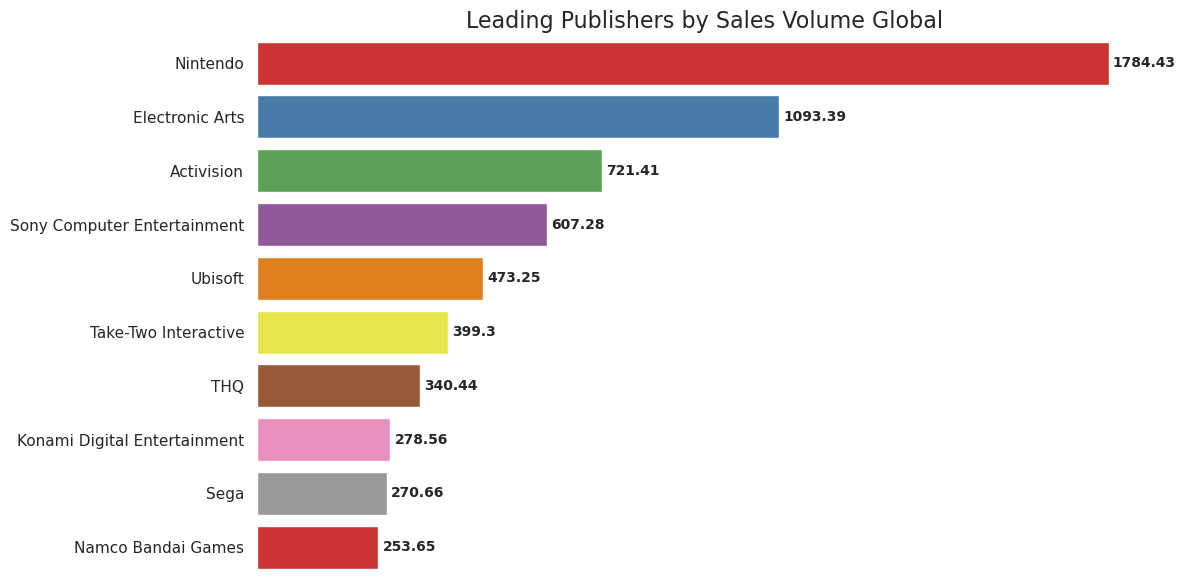

In [48]:
publisher_sales = df.groupby('publisher')['global_sales'].sum().reset_index()
publisher_sales_10 = publisher_sales.nlargest(10, 'global_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=publisher_sales_10,
            x='global_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Leading Publishers by Sales Volume Global', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

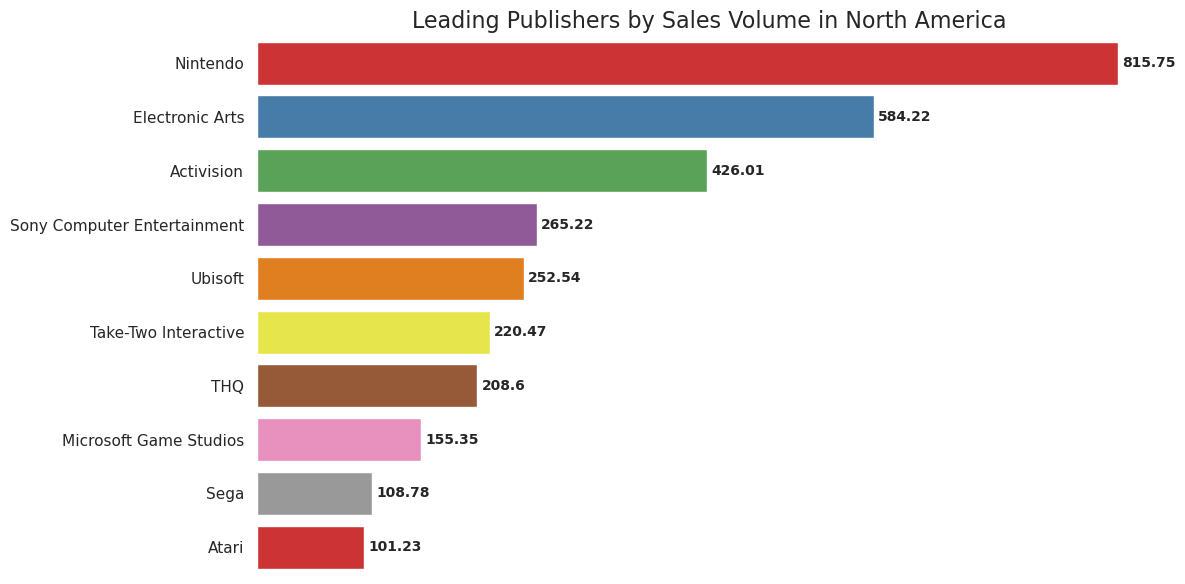

In [49]:
p_sales_na = df.groupby('publisher')['na_sales'].sum().reset_index()
p_sales_10_na = p_sales_na.nlargest(10, 'na_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_na,
            x='na_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Leading Publishers by Sales Volume in North America', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

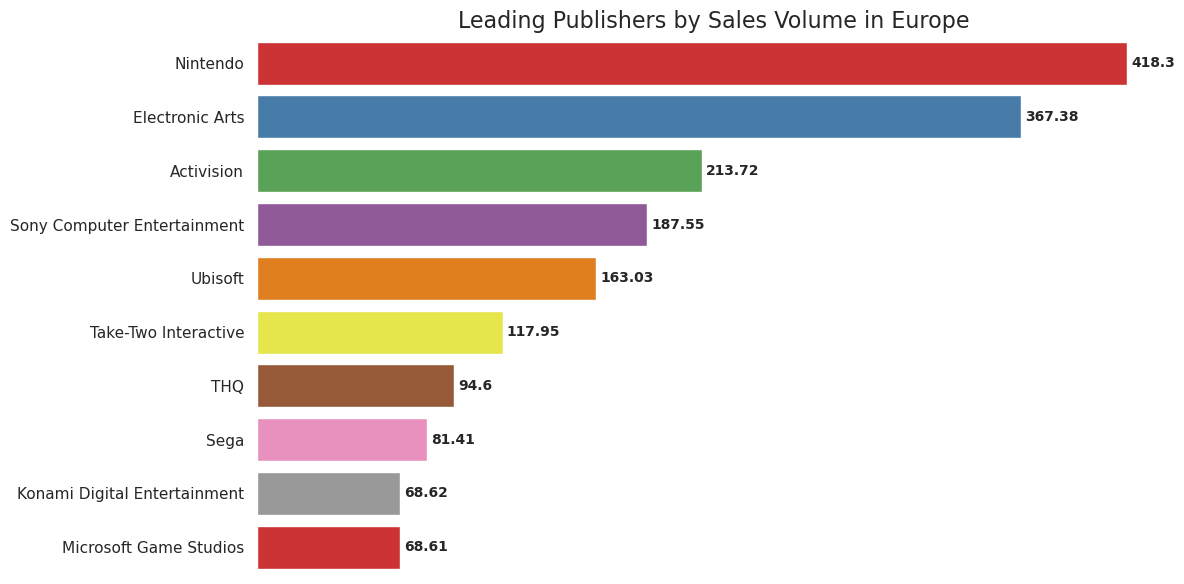

In [50]:
p_sales_eu = df.groupby('publisher')['eu_sales'].sum().reset_index()
p_sales_10_eu = p_sales_eu.nlargest(10, 'eu_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_eu,
            x='eu_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Leading Publishers by Sales Volume in Europe', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

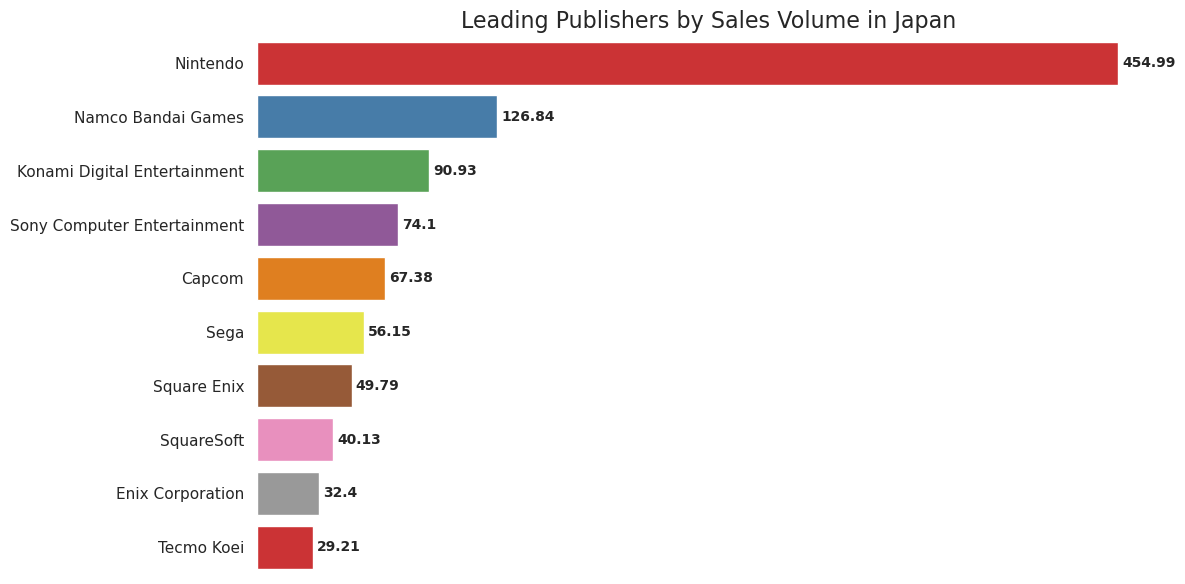

In [51]:
p_sales_jp = df.groupby('publisher')['jp_sales'].sum().reset_index()
p_sales_10_jp = p_sales_jp.nlargest(10, 'jp_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_jp,
            x='jp_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Leading Publishers by Sales Volume in Japan', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

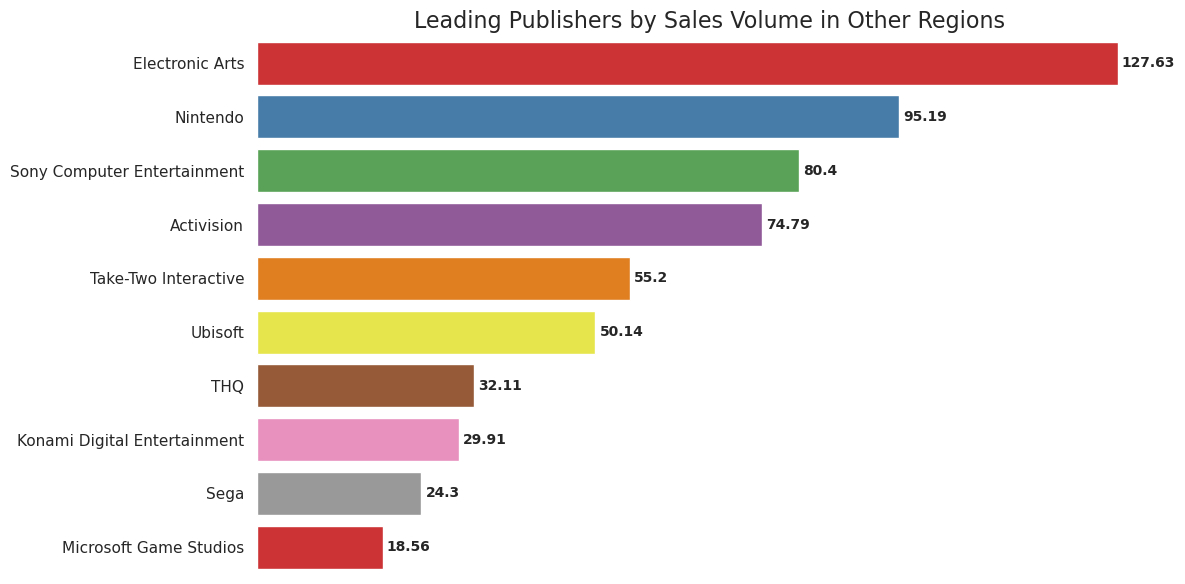

In [52]:
p_sales_other = df.groupby('publisher')['other_sales'].sum().reset_index()
p_sales_10_other = p_sales_other.nlargest(10, 'other_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_other,
            x='other_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Leading Publishers by Sales Volume in Other Regions', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

# Key Findings and Market Oriented Analysis
In this section, we seek to answer fundamental strategic questions to better understand the sector. The analysis will shift from purely descriptive to focusing on two main pillars:

1. **Regional Particularities** 

We will perform a deep dive into specific markets to identify local consumption patterns. This approach allows us to explore how **genre and platform preferences** vary geographically, revealing unique opportunities and challenges in each region.

2. **Sales Efficiency and Profitability** 

So far, we have analyzed **total revenue** and **volume of titles** in isolation. Now, we will cross-reference these metrics to calculate sales efficiency. The goal is to go beyond **gross revenue** and identify which strategies and platforms deliver the best **average sales per release**, offering a more precise perspective on the performance and relevance of major companies in the market.

## 1. How did genre preferences evolve in each region over the years?

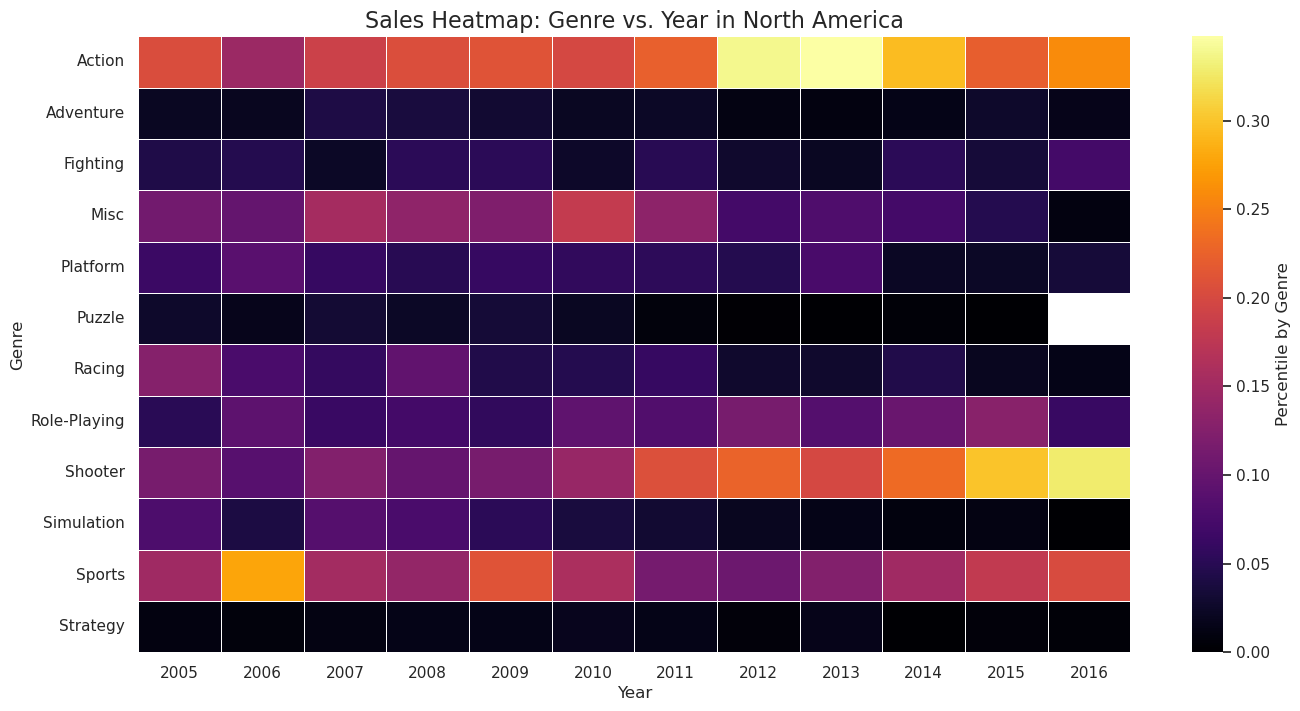

In [53]:
df_heatmap = df.groupby(['year', 'genre'])['na_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='na_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Percentile by Genre'})

plt.title('Sales Heatmap: Genre vs. Year in North America', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()


In the North American market, the **Action** and **Sports** genres maintain a **dominant position** throughout the analyzed period, indicating consolidated categories with **low commercial risk**. From 2011 onwards, there is a **consistent growth** in the **Shooter genre**, which reaches its highest relevance around 2016. This signals a shift in the **portfolio mix** toward titles with higher **competitive appeal** and potential for recurring engagement.

In contrast, the **Racing** and **Simulation** genres show a **contraction** over time, suggesting a reduction in **relative attractiveness**. Meanwhile, the **Role-Playing** genre remains **stable**, indicating loyal demand but with **lower expansion potential**.

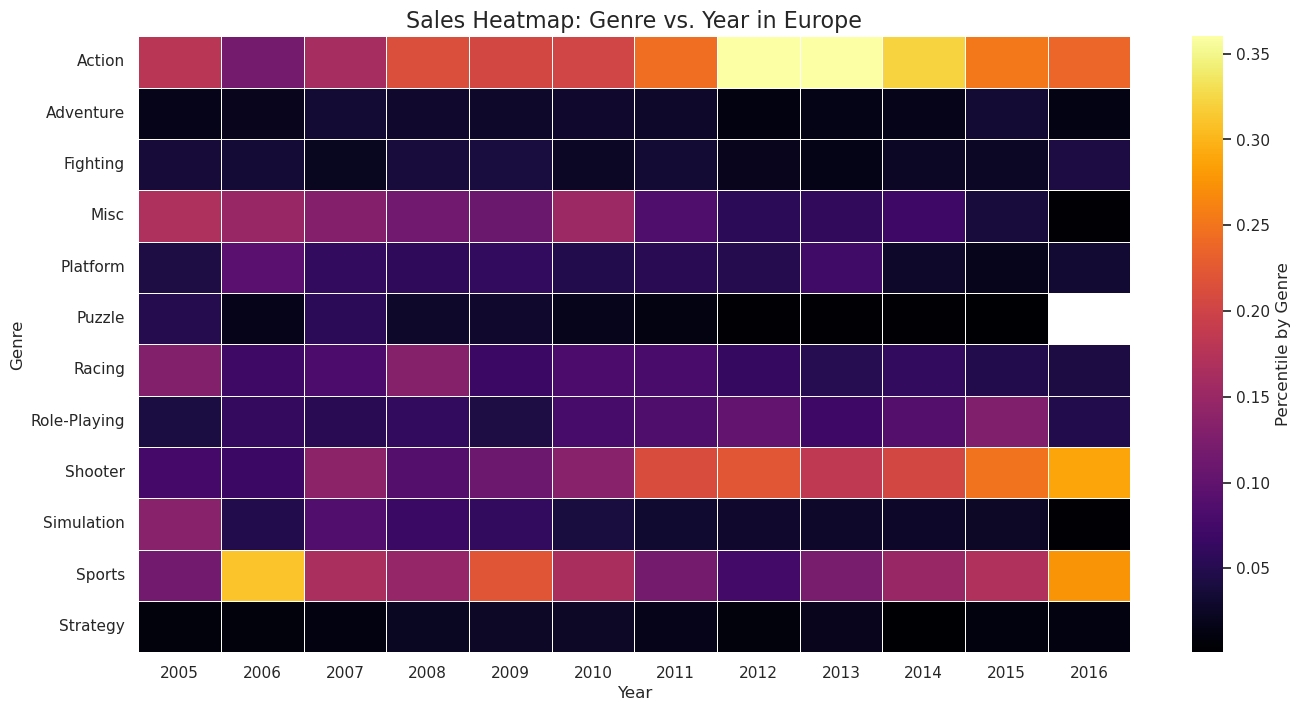

In [54]:
df_heatmap = df.groupby(['year', 'genre'])['eu_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='eu_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Percentile by Genre'})

plt.title('Sales Heatmap: Genre vs. Year in Europe', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()


In the European market, a pattern similar to the North American one is observed, with the **Actio**n and **Sports** genres maintaining their dominance throughout the analyzed period. **The Shooter** genre shows a **growth trajectory** comparable to that seen in the United States, indicating the consolidation of this segment within the European market.

The **Racing** genre, in turn, demonstrates relatively stable behavior over time, suggesting a consistent demand base and **lower volatility** compared to other regions.

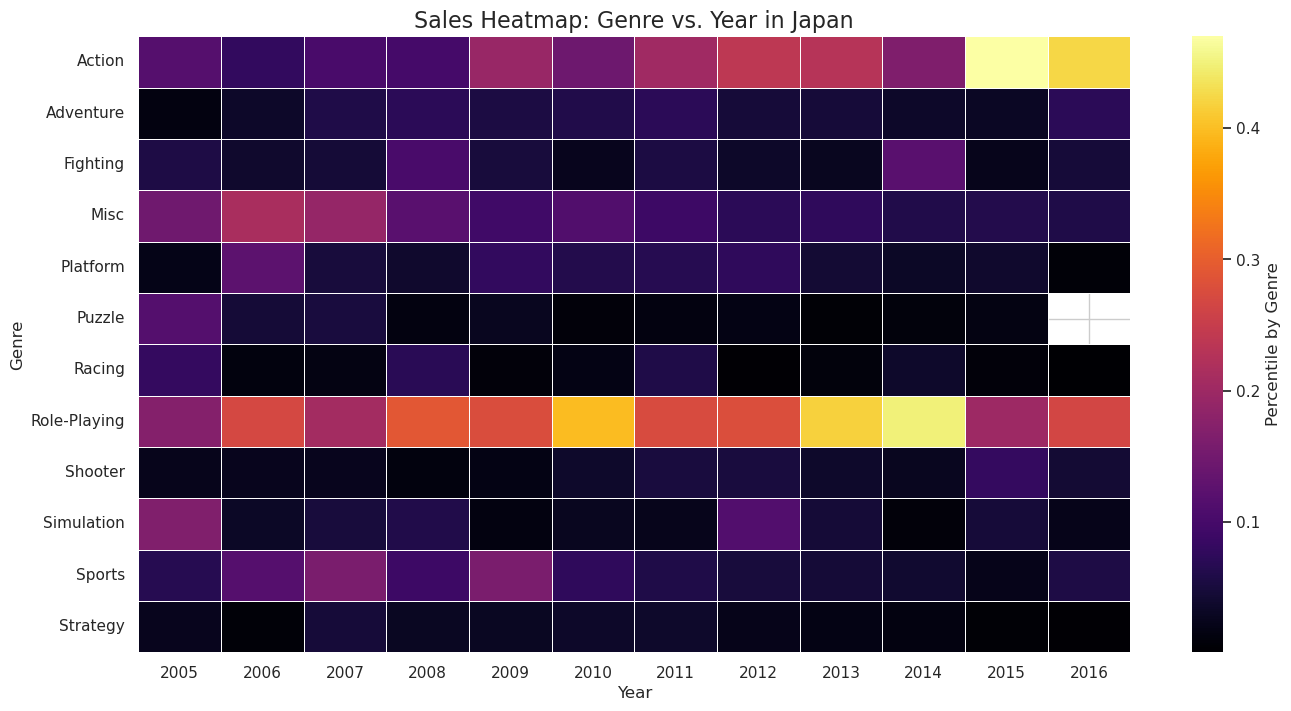

In [ ]:
df_heatmap = df.groupby(['year', 'genre'])['jp_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='jp_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Percentile by Genre'})

plt.title('Sales Heatmap: Genre vs. Year in Japan', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()


In the Japanese market, a **distinct pattern** is observed compared to the other analyzed regions. The **Role-Playing** genre shows **consistent dominance** throughout the period, indicating a strong structural preference for this segment. Although the **Action** genre is already consolidated, there is a more **recent rise**, suggesting a gradual expansion of its share within the regional portfolio.

In contrast to Western markets, the **Sports** genre holds lower relative relevance, and the rise of the **Shooter** genre seen in North America and Europe is not observed here. Other genres maintain a relatively **stable** market share over the period, reinforcing a market with more clearly defined preferences.

## 2. Historical Efficiency Analysis: Which platforms generate the highest average revenue per title?

In [56]:
# Grouping by platform
df_eff = df.groupby('platform').agg(
    total_sales=('global_sales', 'sum'),
    num_games=('name', 'count')
).reset_index()

# Efficiency (average)
df_eff['sales_per_game'] = df_eff['total_sales'] / df_eff['num_games']

# Filtering only Platforms with at least 100 Games
df_eff = df_eff[df_eff['num_games'] >= 100].sort_values('total_sales', ascending=False)

df_eff

,platform,total_sales,num_games,sales_per_game
16,PS2,1233.46,2127,0.579906
28,X360,969.61,1235,0.785109
17,PS3,949.35,1304,0.728029
26,Wii,909.81,1290,0.705279
4,DS,818.67,2132,0.383992
15,PS,727.39,1189,0.611766
6,GBA,313.56,811,0.386634
19,PSP,291.71,1197,0.243701
18,PS4,278.07,335,0.830060
13,PC,255.05,943,0.270467


/tmp/ipykernel_662/3899982697.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




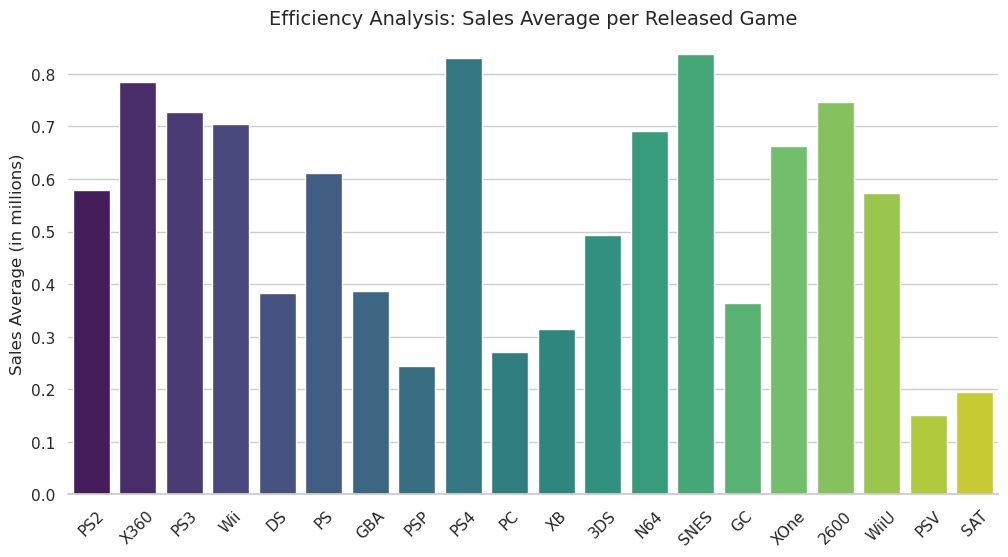

In [ ]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_eff, x='platform', y='sales_per_game', palette='viridis')
plt.title('Efficiency Analysis: Sales Average per Released Game', fontsize=14)
plt.ylabel('Sales Average (in millions)')
plt.xlabel('')
plt.xticks(rotation=45)
sns.despine(left=True)

plt.show()

The analysis of historical efficiency, defined as the global sales volume per title released on each platform, reveals that a higher volume of releases does not necessarily imply a higher average return. Platforms such as **SNES, PS4,** and **Xbox 360** exhibit the highest levels of average efficiency per title, indicating that leaner or better-curated catalogs tend to concentrate greater value per launch.

In contrast, platforms with a high number of titles, such as **Nintendo DS** and **PlayStation 2**, despite leading in volume of releases, show relatively lower average efficiency. This suggests a dilution of returns associated with high supply density. On the other hand, consoles like the **Xbox 360, PlayStation 3**, and **Wii** demonstrate a better balance between scale and efficiency, indicating more optimized portfolio strategies during the analyzed period.

A consistent pattern of lower average efficiency is also observed in handheld platforms, including the **DS, GBA, PSP, PS Vita**, and **3DS**, regardless of the total sales volume or the platform's commercial success. This behavior suggests structural characteristics of the handheld segment that negatively impact the average return per title. Similarly, the **PC** platform, despite its broad base and diversity of titles, shows low average efficiency, reflecting high demand fragmentation and strong internal competition among releases.

Overall, the results indicate that average efficiency per title is more closely associated with portfolio strategy and release density than with a platform's total sales volume. These findings reinforce the importance of curation, positioning, and segmentation in maximizing average returns in highly competitive markets.